<a href="https://colab.research.google.com/github/spacemaninSeoul/fast_campus_ML300/blob/main/ML300_P4_C1_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 01 : iris 데이터로 기본적인 군집분석(clustering) 원리와 분석 과정을 연습해보자.

## Step0: 군집분석의 기본지식 및 학습목표 확인

### **군집분석이란**?  
: **unsupervised learning**으로, 데이터 간의 유사도를 정의하고 그 유사도에 가까운 것부터 순서대로 합쳐 가는 방법이며, 유사도의 정의에는 거리나 상관계수 등 여러 가지가 있다. 

### **군집분석의 기본지식**  
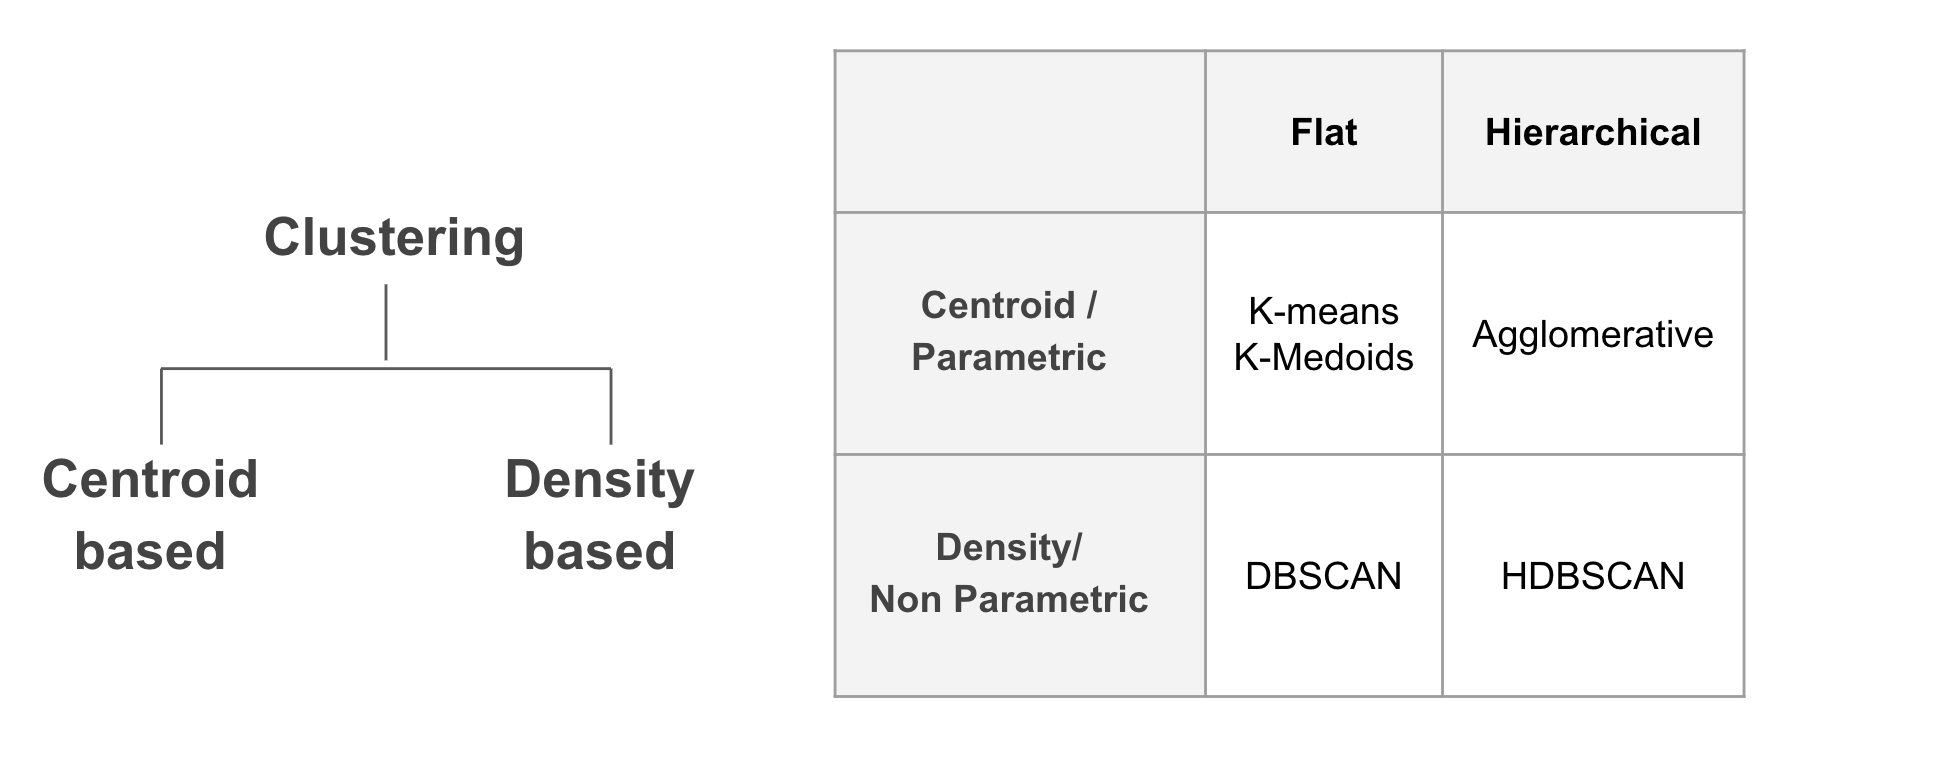


### **학습목표**
```
- 군집분석(Clustering)의 다양한 알고리즘을 경험.
- 알고리즘 훈련에 필요한 파라미터를 알맞게 조절.
- 알고리즘 훈련 결과를 시각화, 수치화를 통해 평가.
- 서로 다른 알고리즘의 차이점을 이해.
``` 

## Step1: 데이터 불러오기 & 전처리

In [2]:
# 필요한 모듈 import
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [3]:
# iris 데이터 셋 불러오기
iris = load_iris()

# array 형태를 DataFrame으로 변환.
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 문제 1. EDA - 컬럼명 재할당하기 
: 컬럼명을 아래와 같이 변경해줍니다.  

변경전 -> 변경후    
`sepal length` -> `sepal_length`  
`sepal width` -> `sepal_width`  
`petal length` -> `petal_length`  
`petal length` -> `petal_width`  

In [4]:
# 컬럼명을 사용하기 편하게 변경.
columns_name_list = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 방법1: 순서대로 입력.
#iris_df.columns = columns_name_list

# 방법2: dictionary형태를 사용
column_replace_dict = {k:v for k, v in zip(iris.feature_names, columns_name_list)}
iris_df.rename(column_replace_dict, axis='columns', inplace=True) # axis ='columns >> axis=1 가능.
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# target 칼럼 추가.
iris_df['target'] = iris.target
iris_df.target.unique()

array([0, 1, 2])

### 문제 2. EDA - 결측값 확인하기  
: 각 컬럼의 결측값을 확인하고 결측값을 채워줍니다.

In [6]:
# 간단하게 컬럼별 결측값 유뮤 확실
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

### 문제 3. EDA - 데이터 시각화 해보기
: 각 컬럼의 특징을 파악하고 시각화를 통해 데이터의 분포를 확인합니다.

In [7]:
# 컬럼별 데이터 type을 확인.
iris_df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target            int64
dtype: object

In [8]:
# 컬럼별 분포 특징 확인
# 분위수를 확인해 정규화과정이 필요한지 생각해보기.
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
# plotly를 사용해 scatter plot 시각화하기.

# plotly 모듈 import.
# plotly에서 express 사용하기.
import plotly.express as px

# scatter plot 생성.
fig = px.scatter(iris_df, x='sepal_width', y='sepal_length')

# 그래프 사이즈 조절
fig.update_layout(width=600, height=500)

# 그래프 확인
fig.show()

In [10]:
# scatter plot에 target 컬럼 색으로 나타내기.
fig = px.scatter(iris_df, x='sepal_width', y='sepal_length', color='target')
fig.update_layout(width=600, height=500)
fig.show()

In [11]:
# 다른 컬럼으로 scatter plot 만들기.
fig = px.scatter(iris_df, x='petal_width', y='petal_length', color='target')
fig.update_layout(width=600, height=500)
fig.show()

## Step2: Clustering : K-Means 알고리즘

### 문제 4. Clustering : K-Means - K-Means 모듈 탐색하기.

In [12]:
# K Means 모듈 import
from sklearn.cluster import KMeans

### 문제 5. Clustering : K-Means - train, test set으로 분리하기.

In [13]:
# iris 데이터를 X, Y로 나누기
X = iris_df.iloc[:, :-1]
Y = iris_df.iloc[:, -1]

# train/test 8:2 비율로 나누기
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=1)
print(len(train_x), len(test_x))

120 30


### 문제 6. Clustering : K-Means - K-Means 모듈 훈련시키기.

In [14]:
# 5개의 그룹으로 clustering 해보기
km = KMeans(n_clusters=5)
km

KMeans(n_clusters=5)

In [15]:
# train set을 훈련시키고 cluster 결과를 확인.
km.fit(train_x)
clusters_array = km.labels_
print(clusters_array)

[2 3 4 1 1 0 4 0 2 1 1 0 2 1 2 3 0 0 0 4 0 0 3 1 3 1 2 2 3 4 0 2 2 0 0 1 0
 2 1 2 2 1 2 0 4 2 1 4 1 4 0 0 0 1 0 2 1 2 0 0 4 0 3 2 3 1 2 1 3 4 0 4 0 4
 2 0 2 0 0 1 2 1 0 0 2 0 2 0 1 4 0 1 0 4 0 4 4 0 0 4 0 2 2 0 2 4 2 2 2 0 0
 2 4 3 4 2 1 2 1 0]


In [16]:
# 실제 iris데이터와 훈련된 cluster의 결과를 비교.
compare_clusters = dict(zip(clusters_array, train_y))
print(compare_clusters)

{2: 1, 3: 2, 4: 1, 1: 2, 0: 0}


In [17]:
# 훈련된 label 기준으로 시각화.
fig = px.scatter(train_x, x='petal_width', y='petal_length', color=clusters_array)
fig.update_layout(width=600, height=500)
fig.show()

In [18]:
# 훈련된 label 기준으로 시각화.
fig = px.scatter(train_x, x='sepal_width', y='sepal_length', color=clusters_array)
fig.update_layout(width=600, height=500)
fig.show()

In [19]:
# Sum of squared distances of samples to their closest cluster center.
# [참고] k-means 알고리즘의 특성상, 훈련할때마다 km.inertia_ 값도 차이가 생깁니다.
km.inertia_

35.699845463911686

### 문제 7. Clustering : K-Means - 최적의 k 찾기 (Elbow method).
: unsupervised 방법이므로 실제로 k(cluster 수)는 정해져 있지 않습니다. 따라서 최적의 k를 찾는 것부터 시작하게 됩니다. 

```
최적의 k를 찾는 것이 k-means의 전체과정 중에서 가장 중요한 step입니다.
```

> "Elbow method"란?  
: **Total intra-cluster variation (or total within-cluster sum of square (=WSS))**가 최소가 되는 k를 찾는 방법.




In [20]:
# elbow method를 사용해 최적의 k를 찾기
# # k와 sum of squared distances from each point의 합(distortions)을 비교합니다.

distortions = []
k_range = range(1, 11)
for i in k_range:
  km = KMeans(n_clusters = i)
  km.fit(train_x)
  distortions.append(km.inertia_)

print(distortions)

[549.0235000000001, 123.1564001234949, 63.861880396389324, 45.493943093943095, 35.699845463911686, 30.73419538029964, 26.506171292759532, 23.917516618966435, 22.363342514941195, 21.023492458521865]


In [21]:
# elbow method 그래프를 통해 이해하기
# X축이 k의 수, y축이 distortions인 line plot을 그린다.
fig = px.line(x=k_range, y=distortions, labels={'x':'k', 'y':'distortions'})
fig.update_layout(width=800, height=500)
fig.show()

### 문제 8. Clustering : K-Means - 최적의 k 찾기 (KElbowVisualizer 사용해보기).
: model 훈련과 함께 그래프를 그려주고 훈련 시간까지 확인해주는 모듈인 KElbowVisualizer를 사용해봅니다.  
> Yellowbrick extends the Scikit-Learn API to make a model selection and hyperparameter tuning easier.


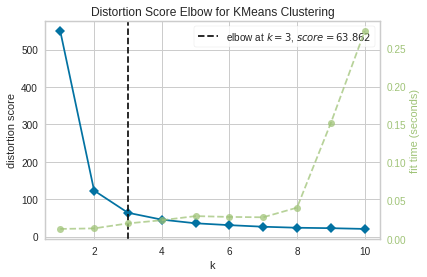

In [22]:
# KElbowVisualizer 사용해서 훈련(training)과 그래프를 한번에 해결해보세요.
from yellowbrick.cluster import KElbowVisualizer

km = KMeans()
visualizer = KElbowVisualizer(km, k=(1, 11))
visualizer.fit(train_x)
visualizer.poof()

### 문제 9. Clustering : K-Means - 최적의 k 찾기 (kneed 모듈 사용해보기).
: 그래프를 확인하지 않고도 최적의 k값을 자동으로 찾아주는 모듈인 kneed를 사용해봅니다.

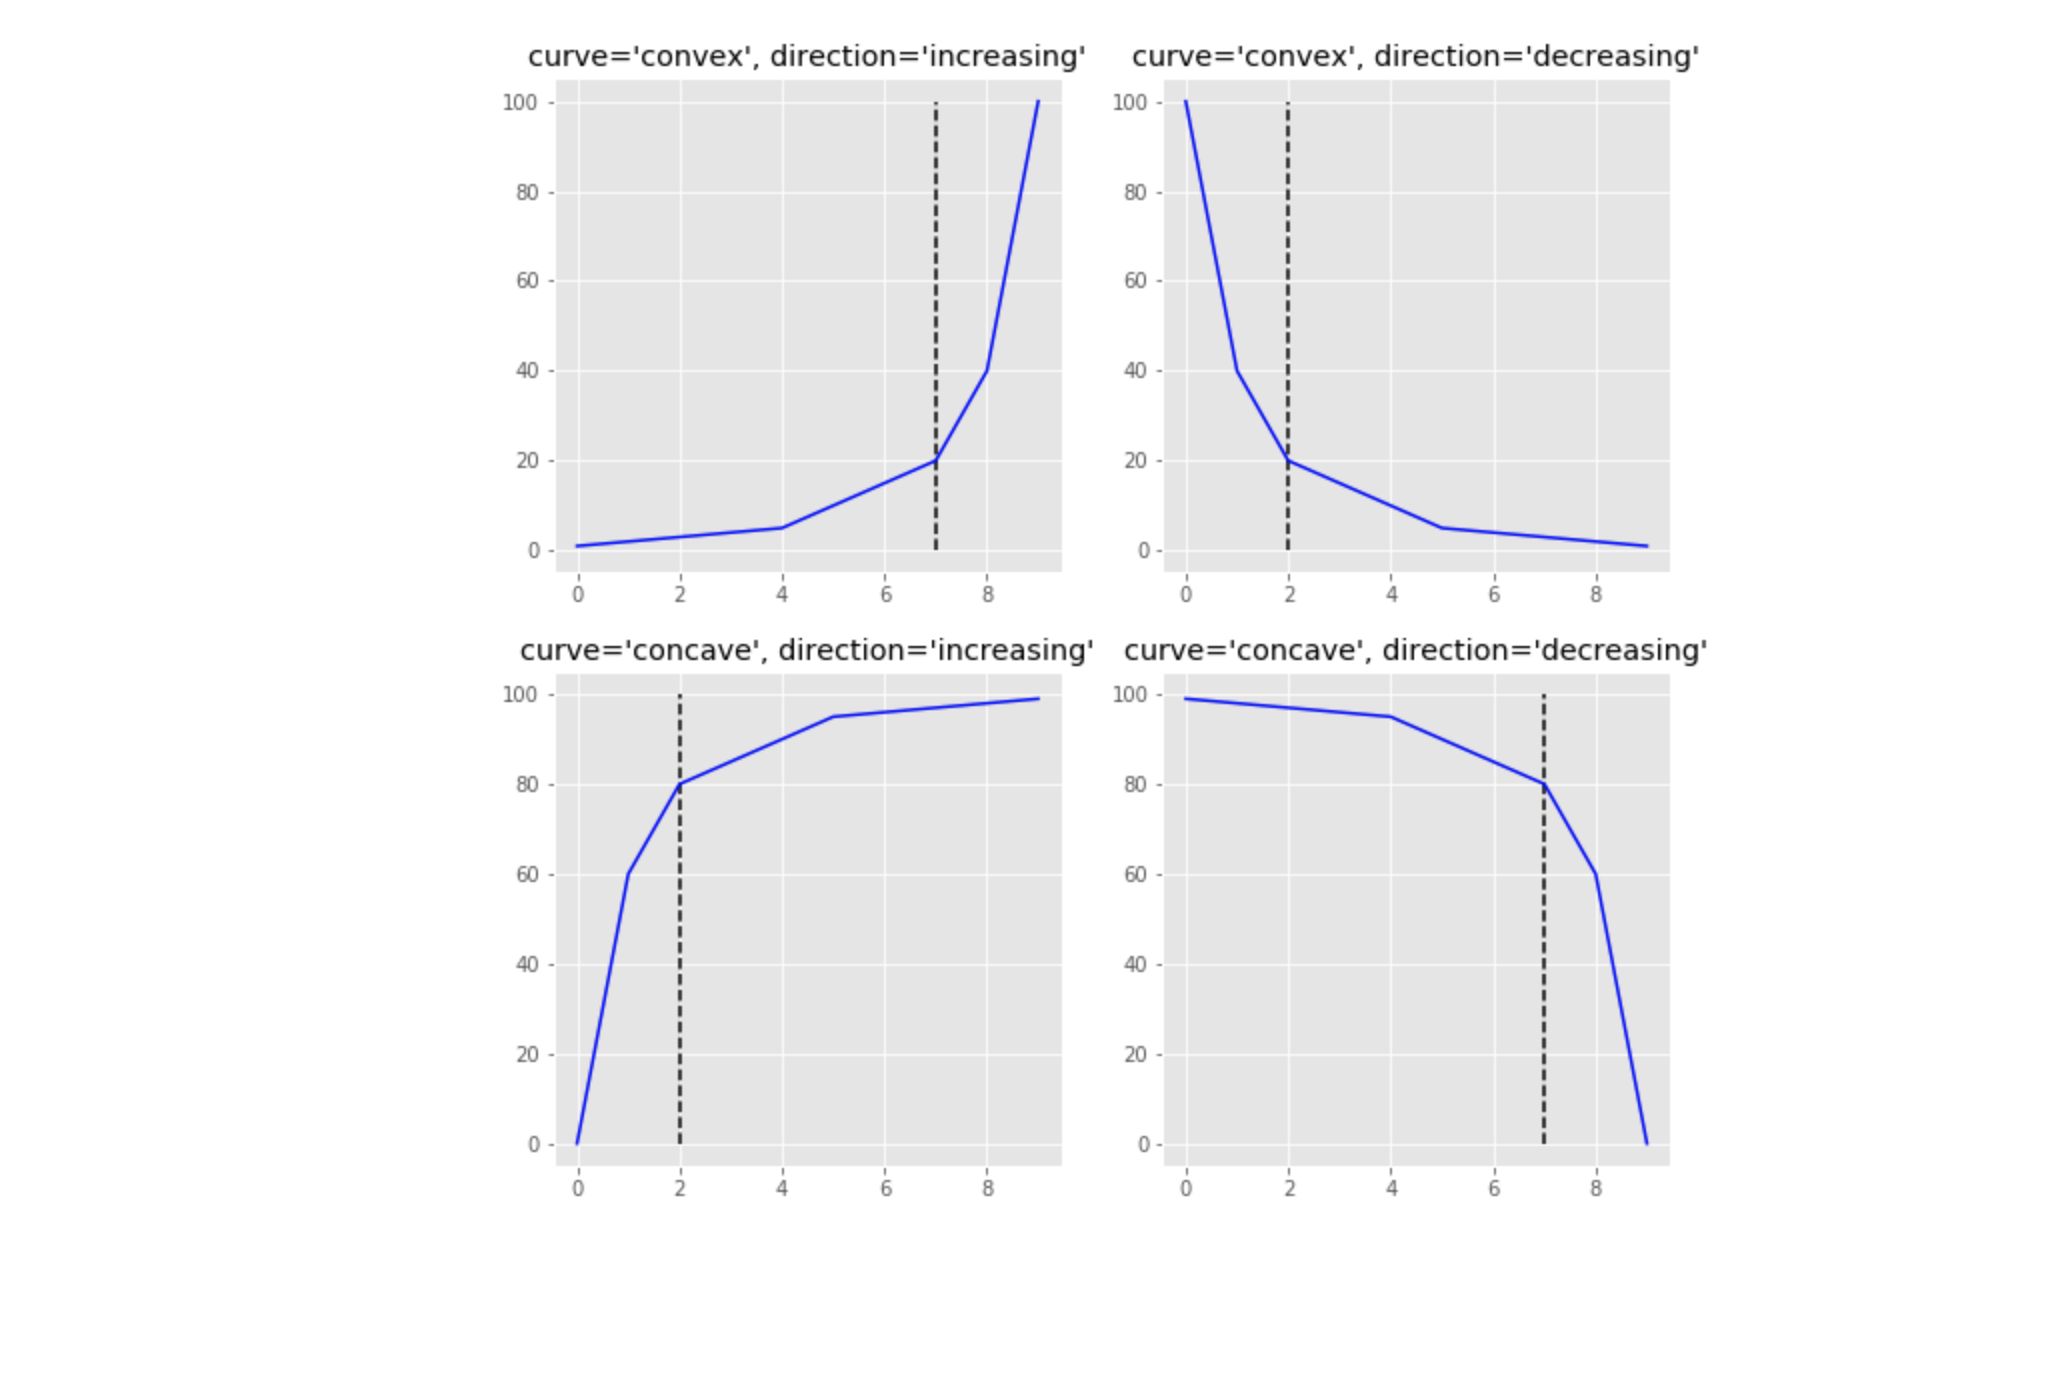

In [23]:
!pip install kneed

In [24]:
# 아래 parameter를 참고하여 kneed 모듈을 사용하여 자동으로 elbow값을 찾아보세요.
from kneed import KneeLocator
"""
[KneeLocator parameter 참고]
curve (str) – If ‘concave’, algorithm will detect knees. If ‘convex’, it will detect elbows.
direction (str) – one of {“increasing”, “decreasing”}
"""
kneedle = KneeLocator(x=k_range, y=distortions, S=1.0, curve='convex', direction='decreasing')
print(f'최적의 k : {round(kneedle.elbow, 3)}')
print(f'최적의 k의 y값 : {round(kneedle.elbow_y, 3)}')

# 볼록 curve plot의 경우, 아래와 같이 knee를 찾습니다.
# print(round(kneedle.knee, 3))
# print(round(kneedle.knee_y, 3))

최적의 k : 3
최적의 k의 y값 : 63.862


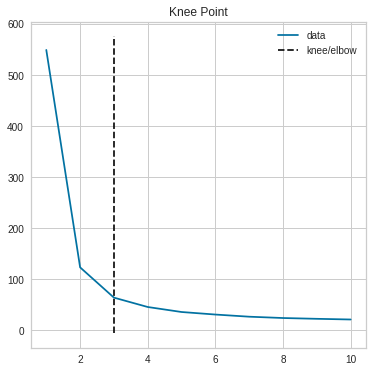

In [25]:
# kneed 모듈에서 간단한 plot 생성도 지원합니다.
kneedle.plot_knee()

### 문제 10. K-Means - 최적의 k 찾기 (Silhouette method).
: 최적의 k를 찾는 다른 방법으로, cluster내의 거리가 아닌 **cluster간의 거리**도 함께 고려한 계수를 사용해서 최적의 k를 비교해봅니다.

> "Silhouette method"란?  
: **cluster내의 거리와 cluster간의 거리**를 사용한 계수로 Silhouette coefficient(SC)값이 최대가 되는 k를 찾는 방법.


> SC 해석?  
: 각 cluster 사이의 거리가 멀고 cluster 내 데이터의 거리가 작을수록 군집 분석의 성능이 좋음.
Silhouette 값은 -1에서 1까지 가능하며, 0일 경우에는 cluster간의 변별력이 없다는 의미. -1에 가까울수록 clustering의 결과가 좋지 않음을 의미.


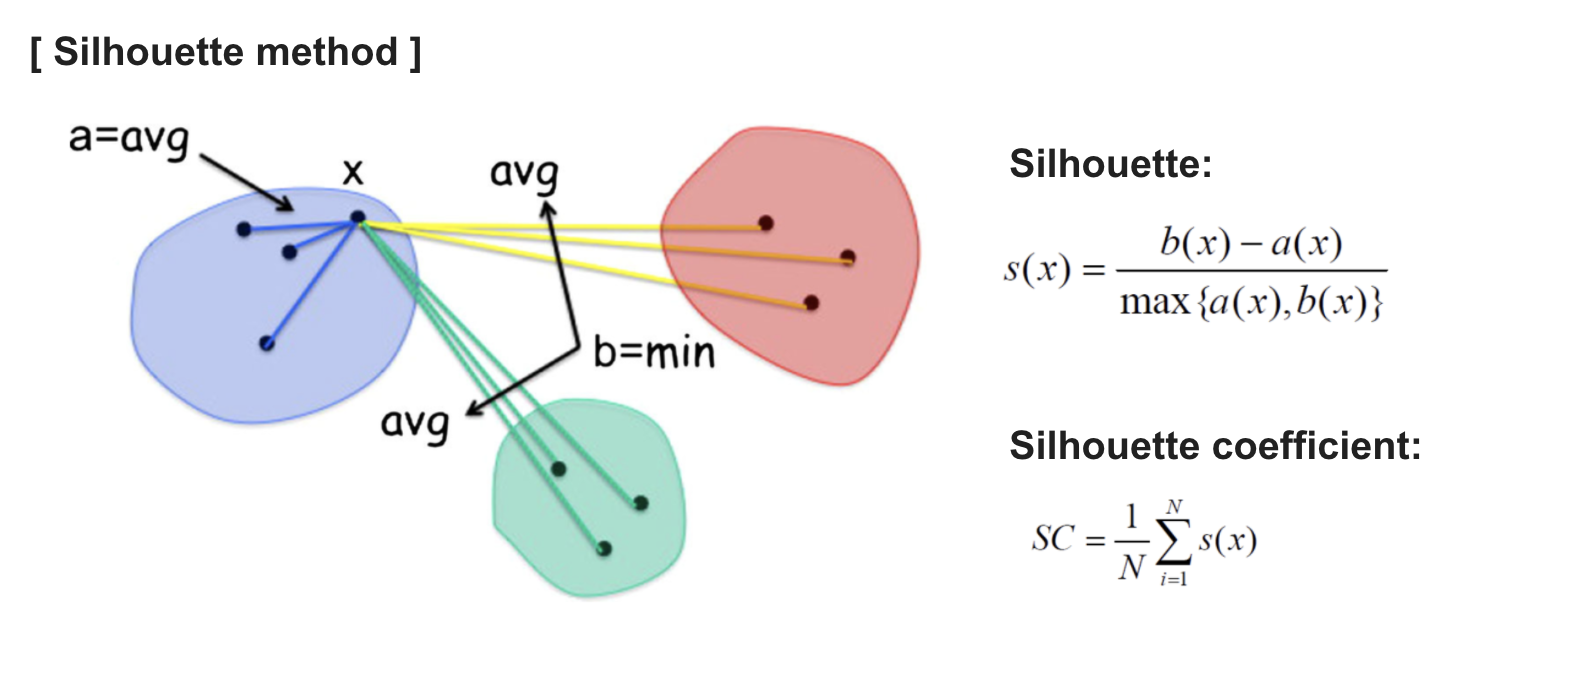

In [26]:
# silhouette_score 모듈을 사용해봅니다.
# [주의!] silhouette_score는 array 형태를 읽을 수 있습니다. 
# [주의!] 군집간의 거리 계산을 필요로 하기때문에, 최소 2개이상의 label/cluster가 있어야 합니다.
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, 11)

for i in k_range:
  km = KMeans(n_clusters = i)
  km.fit(train_x)
  label = km.predict(train_x)
  sc_value = silhouette_score(np.array(train_x), label, metric='euclidean', sample_size=None, random_state=None)
  silhouette_scores.append(sc_value)
  print(f'Silhouette score(n={i}): {sc_value}')

Silhouette score(n=2): 0.6813913917541521
Silhouette score(n=3): 0.5429514489927679
Silhouette score(n=4): 0.49345043486798057
Silhouette score(n=5): 0.49734559102644377
Silhouette score(n=6): 0.36944899368921846
Silhouette score(n=7): 0.3545512741600323
Silhouette score(n=8): 0.338826944075514
Silhouette score(n=9): 0.35583203414571934
Silhouette score(n=10): 0.3085215425874416


In [27]:
# Silhouette method를 그래프를 통해 이해해 봅시다.
# x축이 k의 수, y축이 silhouette scores line plot을 그려봅시다.
fig = px.line(x=k_range, y=silhouette_scores, labels={'x':'k', 'y':'Silhouette Scores'})
fig.update_layout(width=800, height=500)
fig.show()

### 문제 11. Clustering : K-Means - 최적의 k 찾기 (SilhouetteVisualizer 사용해보기).
: KElbowVisualizer와 유사한 SilhouetteVisualizer를 사용해보고 Elbow method와는 다른 그래프를 해석하는 방법을 배워봅니다.
> silhouette score만 보는 것이 아닌, 그래프를 통해 각 군집의 분포를 종합적으로 평가합니다.


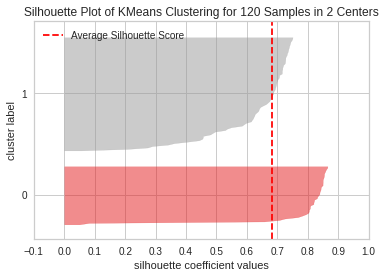

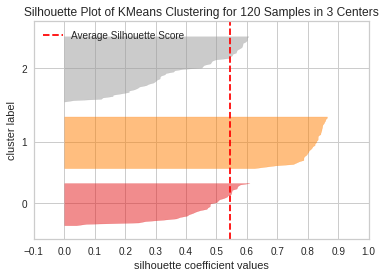

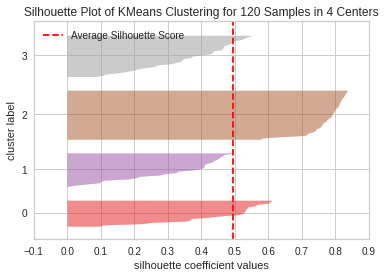

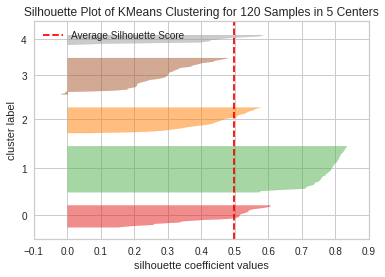

In [28]:
# SilhouetteVisualizer 사용해서 훈련(training)과 그래프를 한번에 해결해보세요.
from yellowbrick.cluster import SilhouetteVisualizer

# k의 범위 지정해야. 최소 2개 이상의 label/cluster가 있어야 한다.
k_range = range(2,6)
for i in k_range:
  km = KMeans(n_clusters= i, init='k-means++')
  visualizer = SilhouetteVisualizer(km)
  visualizer.fit(train_x)
  visualizer.poof()

### 문제 12. Clustering : K-Means - 최적의 k를 사용하여 모델 훈련시키기.  
: 위에서 구한 최적의 k를 사용하여 다시 모델을 훈련시켜봅니다.


In [29]:
# 위에서 찾은 최적을 k를 할당하고 k-means model 훈련을 시켜보세요.
k = 3
km = KMeans(n_clusters = k).fit(train_x)
train_cluster = km.labels_

### 문제 13. Clustering : K-Means - 훈련된 cluster를 그래프로 비교해보기.
: 훈련시킨 k-means model의 cluster 결과를 원래의 label과 비교해봅시다.

In [30]:
# 실제 label과 훈련된 결과 cluster를 그래프로 비교해보기.
# plotly에서 subplot을 만들기.
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, subplot_titles=('Actual', 'K-means cluster'))

fig.add_trace(
    go.Scatter(x=train_x['sepal_width'],
               y=train_x['sepal_length'],
               mode='markers',
               marker =dict(color=train_y),
               ),
              row=1, col=1
)

fig.add_trace(
    go.Scatter(x=train_x['sepal_width'],
               y=train_x['sepal_length'],
               mode='markers',
               marker=dict(color=train_cluster),
               ),
              row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [31]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('Actual', 'K-means cluster'))

fig.add_trace(
    go.Scatter(x=train_x['petal_width'],
               y=train_x['petal_length'],
               mode='markers',
               marker =dict(color=train_y),
               ),
              row=1, col=1
)

fig.add_trace(
    go.Scatter(x=train_x['petal_width'],
               y=train_x['petal_length'],
               mode='markers',
               marker=dict(color=train_cluster),
               ),
              row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

### 문제 14: Clustering : K-Means - 훈련된 모델에 test set을 사용해 predict 하기.
: 위의 model이 잘 훈련되었다는 가정하에, test set을 사용하여 모델을 평가해봅시다.

In [32]:
# [문제 12]의 모델을 그대로 사용하여 prediction을 해보세요.
test_cluster = km.fit_predict(test_x)
print(test_cluster)
print(list(test_y))

[0 2 2 0 1 2 1 0 0 1 2 0 1 2 2 0 2 2 0 0 2 2 1 0 1 2 0 0 2 2]
[0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 2, 1, 0, 0, 1, 2]


In [33]:
compare_test_clusters = dict(zip(test_cluster, test_y))
print(compare_test_clusters)

{0: 0, 2: 2, 1: 2}


In [36]:
# [문제 13]과 동일하게 그래프로 prediction결과를 비교해보세요.
fig = make_subplots(rows=1, cols=2, subplot_titles=('Actual-test', 'K-means cluster-test'))
fig.add_trace(
    go.Scatter(x=train_x['sepal_width'],
               y=train_x['sepal_length'],
               mode='markers',
               marker=dict(color=test_y)),
              row=1, col=1
)

fig.add_trace(
    go.Scatter(x=train_x['sepal_width'],
               y=train_x['sepal_length'],
               mode='markers',
               marker=dict(color=test_cluster),
               ),
              row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [37]:
# [문제 13]과 동일하게 그래프로 prediction결과를 비교해보세요.
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual-test","K-means cluster-test"))

fig.add_trace(
    go.Scatter(x=train_x["petal_width"], 
               y=train_x["petal_length"], 
               mode="markers",
               marker=dict(color=test_y),
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=train_x["petal_width"], 
               y=train_x["petal_length"], 
               mode="markers",
               marker=dict(color=test_cluster),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

### 문제 15. Clustering : K-Means - clustering 결과를 수치적으로 평가하기.
: 다차원일수록 그래프를 통해 clustering 결과를 확인하기 어렵기 때문에, 객관적인 수치로 평가하는 방법이 필요합니다. 

In [38]:
# test set의 accuracy score을 구해서 k-means 모델을 평가해보세요.
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(train_y, train_cluster)
test_acc = accuracy_score(test_y, test_cluster)
print(f'Accuracy score of train set : {round(train_acc, 4)}')
print(f'Accuracy score of test set : {round(test_acc, 4)}')

Accuracy score of train set : 0.1083
Accuracy score of test set : 0.4333


### 문제 16. Clustering : K-Means - 실제 cluster명과 매칭해서 accuracy 확인하기.


In [39]:
# 실제 cluster명과 매칭해주는 함수를 만들어보세요.
# [참고] scipy.stats.mode()를 사용합니다.

import scipy

In [40]:
def find_matching_cluster(cluster_case, actual_labels, cluster_labels):
  matched_cluster={}
  actual_case = list(set(actual_labels))
  for i in cluster_case:
    idx = cluster_labels == i
    new_label = scipy.stats.mode(actual_labels[idx])[0][0] # mode = 동일한 위치의 label에서 가장 빈번한 cluster명을 찾아준다.
    actual_case.remove(new_label)
    # 매칭되는 실제 label 명을 dict 형태로 저장.
    matched_cluster[i] = new_label
    print(f'훈련된 label명: {i} >> 가장 빈번한 실제 label명:{new_label}')
  return matched_cluster

In [42]:
km_train_case = list(set(train_cluster))
print(km_train_case)

[0, 1, 2]


In [43]:
# 위의 함수를 사용해 train set의 cluster명을 다시 확인해보세요.
train_perm_dict = find_matching_cluster(km_train_case, train_y, train_cluster)
print(list(train_y)[:10])
print(train_cluster[:10])
print(train_perm_dict)

훈련된 label명: 0 >> 가장 빈번한 실제 label명:2
훈련된 label명: 1 >> 가장 빈번한 실제 label명:0
훈련된 label명: 2 >> 가장 빈번한 실제 label명:1
[1, 2, 1, 2, 2, 0, 1, 0, 1, 2]
[2 0 2 0 2 1 2 1 2 0]
{0: 2, 1: 0, 2: 1}


In [68]:
# 동일한 방법으로 test set의 cluster명을 다시 확인해보세요.
km_test_case = list(set(test_cluster))
test_perm_dict = find_matching_cluster(km_test_case, test_y, test_cluster)
print(list(test_y)[:10])
print(test_cluster[:10])
print(test_perm_dict)

훈련된 label명: 0 >> 가장 빈번한 실제 label명:0
훈련된 label명: 1 >> 가장 빈번한 실제 label명:2
훈련된 label명: 2 >> 가장 빈번한 실제 label명:1
[0, 1, 1, 0, 2, 1, 2, 0, 0, 2]
[0 2 2 0 1 2 1 0 0 1]
{0: 0, 1: 2, 2: 1}


In [69]:
# 함수의 결과 리스트를 사용하며 cluster명을 다시 할당해 주세요.
train_new_labels = [train_perm_dict[label] for label in train_cluster]
test_new_labels = [test_perm_dict[label] for label in test_cluster]

In [71]:
# 새로 할당된 cluster명으로 다시 accuracy score를 계산하고 [문제 15]의 결과값과 비교해보세요.
train_acc = accuracy_score(train_y, train_new_labels)
test_acc = accuracy_score(test_y, test_new_labels)
print(f"Accuracy score of train set : {round(train_acc, 4)}")
print(f"Accuracy score of test set : {round(test_acc, 4)}")

Accuracy score of train set : 0.8833
Accuracy score of test set : 0.9333
